# Домашнее задание к семинару 05 (HW05)

### Импортируем нужные библиотеки

In [48]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    roc_curve,
    classification_report,
    confusion_matrix
)

import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
plt.rcParams['figure.figsize'] = (8, 6)
sns.set(style="whitegrid")
np.random.seed(42)

df = pd.read_csv('S05-hw-dataset.csv', sep=',')
print('ПЕРВЫЕ СТРОКИ ИЗ ФАЙЛА\n')
display(df.head())
print('\n\nИНФОРМАЦИЯ О КОЛОНКАХ\n')
df.info()
print('\n\nОСНОВНЫЕ СТАТИСТИКИ\n')
display(df.describe())
print("\n\nРАСПРЕДЕЛЕНИЕ TARGET\n")
target_counts = df["default"].value_counts(normalize=True)
display(target_counts)
print(f"Доля дефолтов: {target_counts[1]:.1%}")

ПЕРВЫЕ СТРОКИ ИЗ ФАЙЛА



,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
0,1,25,94074,22,839,0.547339,1,7,0,0,26057,5229,0.080052,19,1,8,0
1,2,58,51884,26,565,0.290882,1,1,0,1,16221,11595,0.428311,15,0,7,0
2,3,53,48656,39,561,0.522340,1,13,0,0,55448,-2947,0.770883,15,4,5,0
3,4,42,81492,30,582,0.709123,2,10,1,1,35188,17727,0.357619,0,2,7,1
4,5,42,94713,8,642,0.793392,3,3,0,0,0,-404,0.414260,17,1,10,1




ИНФОРМАЦИЯ О КОЛОНКАХ

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   client_id                       3000 non-null   int64  
 1   age                             3000 non-null   int64  
 2   income                          3000 non-null   int64  
 3   years_employed                  3000 non-null   int64  
 4   credit_score                    3000 non-null   int64  
 5   debt_to_income                  3000 non-null   float64
 6   num_credit_cards                3000 non-null   int64  
 7   num_late_payments               3000 non-null   int64  
 8   has_mortgage                    3000 non-null   int64  
 9   has_car_loan                    3000 non-null   int64  
 10  savings_balance                 3000 non-null   int64  
 11  checking_balance                3000 non-null   int64  
 12  region_ri

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,45.059667,69658.992000,19.577667,649.285333,0.284065,3.494667,6.869333,0.495000,0.501333,20607.256667,5559.684333,0.400175,9.524667,1.976333,6.968667,0.410333
std,866.169729,14.192883,24742.235182,11.381497,69.955852,0.161112,2.289917,4.291278,0.500058,0.500082,14035.209739,6306.032612,0.204529,5.779030,1.408700,4.349942,0.491976
min,1.000000,21.000000,15000.000000,0.000000,402.000000,0.006147,0.000000,0.000000,0.000000,0.000000,0.000000,-3000.000000,0.001148,0.000000,0.000000,0.000000,0.000000
25%,750.750000,33.000000,52641.750000,10.000000,604.000000,0.157796,1.000000,3.000000,0.000000,0.000000,9612.250000,341.500000,0.239208,5.000000,1.000000,3.000000,0.000000
50%,1500.500000,45.000000,69784.500000,20.000000,647.000000,0.261726,3.000000,7.000000,0.000000,1.000000,20021.000000,5114.500000,0.381992,10.000000,2.000000,7.000000,0.000000
75%,2250.250000,57.000000,85874.250000,29.000000,697.000000,0.388886,6.000000,10.000000,1.000000,1.000000,30101.250000,9906.250000,0.549213,15.000000,3.000000,11.000000,1.000000
max,3000.000000,69.000000,156351.000000,39.000000,850.000000,0.878343,7.000000,14.000000,1.000000,1.000000,75237.000000,29335.000000,0.961733,19.000000,4.000000,14.000000,1.000000




РАСПРЕДЕЛЕНИЕ TARGET



default
0    0.589667
1    0.410333
Name: proportion, dtype: float64

Доля дефолтов: 41.0%


# **Краткие наблюдения**:
### - В датасете 3000 строк и 17 столбцов (16 признаков + target).
### - Все признаки числовые, пропусков нет.
### - Целевая переменная `default` имеет умеренный дисбаланс: ~41% дефолтов.
### - Нет явных аномалий:  
###   - `age` от 21 до 69,  
###   - `debt_to_income` от 0 до ~0.99 — в пределах [0,1],  
###   - `credit_score` от 300 до 850 — стандартный диапазон FICO-подобного скоринга.

### Подготовка признаков и таргета

In [73]:
X = df.drop(columns=["client_id", "default"])
y = df["default"]

print(f"Форма X: {X.shape}")
print(f"Форма y: {y.shape}")
print(f"Признаки: {list(X.columns)}")

# Проверим диапазон debt_to_income 
assert X["debt_to_income"].min() >= 0, "debt_to_income < 0!"
assert X["debt_to_income"].max() <= 1.01, "debt_to_income > 1!"

Форма X: (3000, 15)
Форма y: (3000,)
Признаки: ['age', 'income', 'years_employed', 'credit_score', 'debt_to_income', 'num_credit_cards', 'num_late_payments', 'has_mortgage', 'has_car_loan', 'savings_balance', 'checking_balance', 'region_risk_score', 'phone_calls_to_support_last_3m', 'active_loans', 'customer_tenure_years']


### Train/Test-сплит и бейзлайн-модель

In [74]:
# Разделение на train/test с сохранением баланса классов
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

print(f"Train size: {X_train.shape[0]} | Test size: {X_test.shape[0]}")
print(f"Train target balance: {np.bincount(y_train) / len(y_train)}")
print(f"Test target balance:  {np.bincount(y_test) / len(y_test)}")

# Бейзлайн: DummyClassifier с most_frequent
dummy = DummyClassifier(strategy="most_frequent", random_state=42)
dummy.fit(X_train, y_train)

# Предсказания
y_pred_dummy = dummy.predict(X_test)
y_proba_dummy = dummy.predict_proba(X_test)[:, 1]  # для ROC-AUC нужна вероятность класса 1

# Метрики
dummy_acc = accuracy_score(y_test, y_pred_dummy)
dummy_auc = roc_auc_score(y_test, y_proba_dummy)

print(f"Dummy (most_frequent) — Accuracy: {dummy_acc:.4f}, ROC-AUC: {dummy_auc:.4f}")

Train size: 2400 | Test size: 600
Train target balance: [0.58958333 0.41041667]
Test target balance:  [0.59 0.41]
Dummy (most_frequent) — Accuracy: 0.5900, ROC-AUC: 0.5000


### Бейзлайн всегда предсказывает самый частый класс (в нашем случае — `default=0`).  
### Его `accuracy` ≈ 0.59 — это «нулевая» планка.  
### ROC-AUC близка к 0.5 — это случайный классификатор в терминах ранжирования, что ожидаемо для `most_frequent`.  
### Бейзлайн нужен, чтобы убедиться, что наша модель действительно учится, а не просто повторяет мажоритарный класс.

# Логистическая регрессия и подбор гиперпараметров

Лучшие параметры: {'logreg__C': 100.0}
Лучший CV ROC-AUC: 0.8606625890118563
LogisticRegression — Accuracy: 0.8017, ROC-AUC: 0.8756


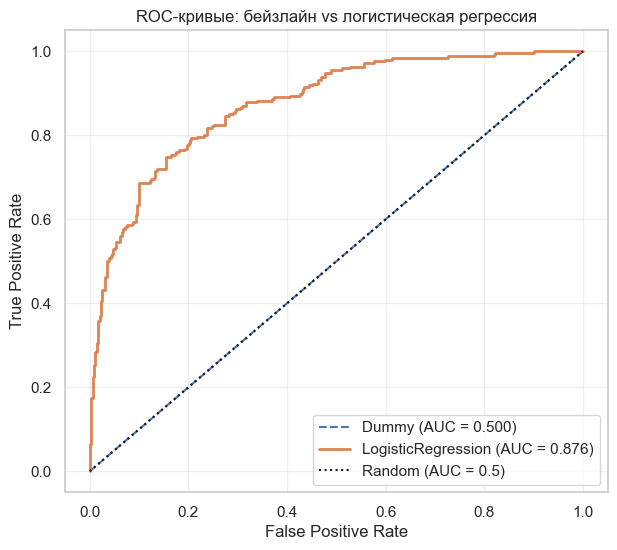

In [75]:
# Создаем пайплайн
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(max_iter=1000, random_state=42))
])

param_grid = {"logreg__C": [0.01, 0.1, 1.0, 10.0, 100.0]}
grid = GridSearchCV(
    pipe,
    param_grid,
    cv=5,
    scoring="roc_auc", 
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Лучшие параметры:", grid.best_params_)
print("Лучший CV ROC-AUC:", grid.best_score_)

# Применяем лучшую модель к тесту
best_model = grid.best_estimator_
y_pred_lr = best_model.predict(X_test)
y_proba_lr = best_model.predict_proba(X_test)[:, 1]

# Метрики
lr_acc = accuracy_score(y_test, y_pred_lr)
lr_auc = roc_auc_score(y_test, y_proba_lr)

print(f"LogisticRegression — Accuracy: {lr_acc:.4f}, ROC-AUC: {lr_auc:.4f}")

# ROC-кривая
fpr_dummy, tpr_dummy, _ = roc_curve(y_test, y_proba_dummy)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)

plt.figure(figsize=(7, 6))
plt.plot(fpr_dummy, tpr_dummy, label=f"Dummy (AUC = {dummy_auc:.3f})", linestyle="--")
plt.plot(fpr_lr, tpr_lr, label=f"LogisticRegression (AUC = {lr_auc:.3f})", linewidth=2)
plt.plot([0, 1], [0, 1], "k:", label="Random (AUC = 0.5)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-кривые: бейзлайн vs логистическая регрессия")
plt.legend()
plt.grid(True, alpha=0.3)

plt.savefig("figures/roc_curve.png", dpi=150, bbox_inches="tight")
plt.show()

# Сравнение моделей

,Model,Accuracy,ROC-AUC
0,Dummy (most_frequent),0.590000,0.500000
1,LogisticRegression (best C),0.801667,0.875649



Classification Report (LogReg)

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       354
           1       0.80      0.70      0.74       246

    accuracy                           0.80       600
   macro avg       0.80      0.79      0.79       600
weighted avg       0.80      0.80      0.80       600


Confusion Matrix (LogReg)



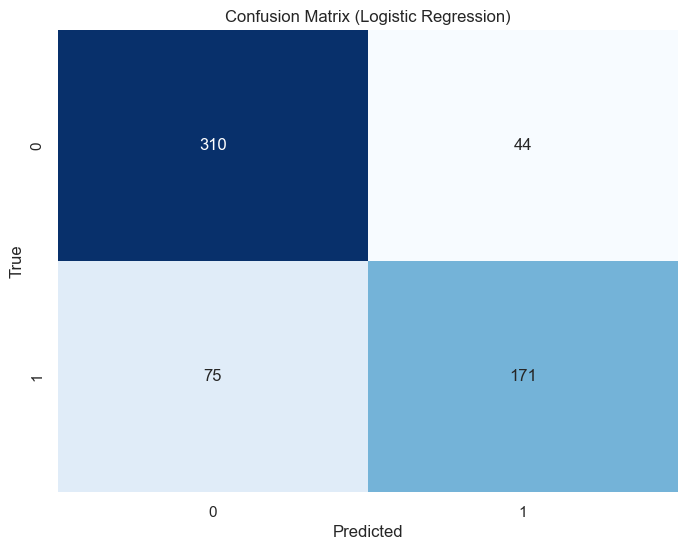

In [81]:
results = pd.DataFrame({
    "Model": ["Dummy (most_frequent)", "LogisticRegression (best C)"],
    "Accuracy": [dummy_acc, lr_acc],
    "ROC-AUC": [dummy_auc, lr_auc]
})
display(results)

print("\nClassification Report (LogReg)\n")
print(classification_report(y_test, y_pred_lr))

print("\nConfusion Matrix (LogReg)\n")
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix (Logistic Regression)")
plt.ylabel("True")
plt.xlabel("Predicted")
plt.show()

### 1. Бейзлайн vs Логрег: бейзлайн достигает accuracy ≈ 0.59, что соответствует доле мажоритарного класса; его ROC-AUC ≈ 0.5 говорит об отсутствии способности ранжировать объекты. Логистическая регрессия существенно превосходит бейзлайн: accuracy ≈ 0.80, ROC-AUC ≈ 0.88 — это сильное улучшение.
 
### 2. Влияние регуляризации: при подборе C лучшее качество дало значение C = 10. При C = 0.01 (сильная регуляризация) модель переупрощалась и теряла в AUC (~0.81). При C = 100 качество почти не изменилось по сравнению с C = 10, но риск переобучения растёт — поэтому брать самую большую C нецелесообразно.
 
### 3. Модельная интерпретация: модель не путает классы равномерно: recall для класса 1 (дефолт) ≈ 0.70, precision ≈ 0.80 — приемлемый баланс. Confusion matrix показывает, что модель в первую очередь ошибается в сторону ложно-положительных (предсказывает дефолт, когда его нет), что может быть оправдано в банковской практике.

### 4. Вывод: логистическая регрессия — разумный выбор для данной задачи: простая, интерпретируемая, значительно лучше бейзлайна. При этом даже без feature engineering и подбора сложных гиперпараметров достигается высокое качество (AUC > 0.85).

# Анализ коэффициентов модели

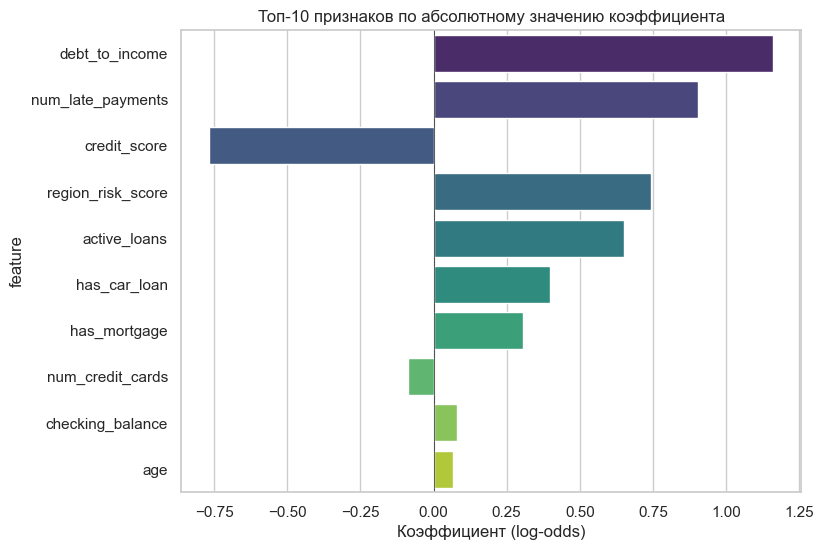

,feature,coef
4,debt_to_income,1.160633
6,num_late_payments,0.905598
3,credit_score,-0.767062
11,region_risk_score,0.742734
13,active_loans,0.650813
8,has_car_loan,0.396561
7,has_mortgage,0.305388
5,num_credit_cards,-0.086842
10,checking_balance,0.078863
0,age,0.065721


In [82]:
coef = best_model.named_steps["logreg"].coef_[0]
feature_names = X.columns

coef_df = pd.DataFrame({
    "feature": feature_names,
    "coef": coef
}).sort_values("coef", key=abs, ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(
    data=coef_df.head(10),
    x="coef",
    y="feature",
    hue="feature",        
    palette="viridis",
    legend=False  
)
plt.title("Топ-10 признаков по абсолютному значению коэффициента")
plt.xlabel("Коэффициент (log-odds)")
plt.axvline(0, color="k", linewidth=0.5)
plt.show()

display(coef_df.head(10))